## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
# Incase we get warnings then the below cade deals with it.
warnings.filterwarnings('ignore')


## Loading the dataset

In [3]:
df=pd.read_csv('hotel_bookings 2.csv')

## Exploratory Data Analysis and Cleaning

In [4]:
# So, let's get a preview of our data

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df.tail()
# Checking the data from bottom as well.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# We are cheking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# In the above mentioned column datatype info, we see that the reservation_status_date column is a object datatype when it should be date-time datatype.
# Since, we will be needing that column, we have to convert it into proper date type.


df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
# Transforming the column into proper datatype.

In [10]:
# We can recheck now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
# Now we want to see all the unique categorical columns in our dataset
# Now we can use describe BUT describe is mainly used for summary statistics of numericals but instead we can use an additional parameter called include
# We can tell describe to include objects so it can give us the summary statistics of categorical values in certain columns


df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
# We have gotten the total count of unique categories of these object table, but what exactly are these unique categories? we just know the total number 
# now we also need to see the value of these object tables

# So, we can use the for loop and the above describe command as it returns values from object table.

for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('*'*50)



hotel
['Resort Hotel' 'City Hotel']
**************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
**************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
**************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
# So from the above result we can pinpoint the required columns, in here the columns hotel, arrival_month, market_segment,distribution_channel
# deposit_type, customer_type and reservation status can be considered important as we don't need the type of food being served.
# In country we can look at the top countries from which huge crowds come from.
#  reserved_room_type,assigned_room_type

In [14]:
# Let's look at the NA values in these categories.

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# So, from the above result, we can remove the agent column, as they are not needed to be considered for the reservation issue, and if we look at the company data then it is huge, 
# and also there is no point in adding the customer and company data.
# Also, since in countries, out of over 1 lakh data we only have almost 500 missing values so we can drop the null values and use the remaining values.

In [16]:
# We will remove the main columns first.
df.drop(['company','agent'], axis=1,inplace=True)

# For removing null values from the overall dataset.

df.dropna(inplace=True)

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
# Now we look at the columns containing numerical values.

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

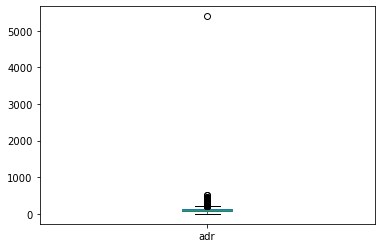

In [19]:
# In the above output, we get to see the statistical summary of columns containing numerical value,
#     We see that in adr column (daily arival rate) there is a negative value, which is an oulier, also at the max part (Last row) of the adr column we see an entry of 5400, 
# which in the end we won't be needing.
# In the babies and children's column, at max we see the number as 10, so such a high number of childrens we can just take it as outlier and remove it if needed.
# The main point of describe is that you are able to see all the outliers or something unusual with our data.
# we also notice that there are a lot of zero values in our data.


df['adr'].plot(kind='box')

# We can see the outlier stand out.

In [20]:
df=df[df['adr']<5000]
# We have removed the outlier.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## Data Analysis and Visualization

In [21]:
# Now that we have worked on the EDA part of the data, now we will work on analysis and visualization.
# So, we will start with working on the cancellation rate
# How much is the percentage for people cancelling the reservations and how many are not?

cancelled_perc=df['is_canceled'].value_counts(normalize=True)

# It counts the number of 0 and 1 and then converts them into percentage.
# 0 meaning no the reservation was not canceled and 1 meaning that it was canceled.
# Using normalization turns it into percentage
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

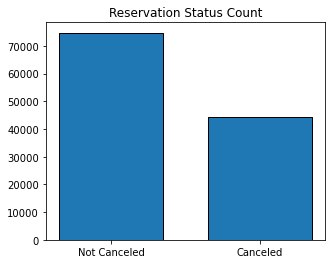

In [22]:
# 62% of people did not cancel their reservations while 37% of people canceled their reservations
# As much as 37% seems less than 62% still, it is greater than 5% and 10% hence ignorning this number now is not an option

# Let's visualize

plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')

# Since, we are showing categorical value we will use bar graph, and we don't need to put normalize here as we are showing count.
plt.bar(['Not Canceled', 'Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

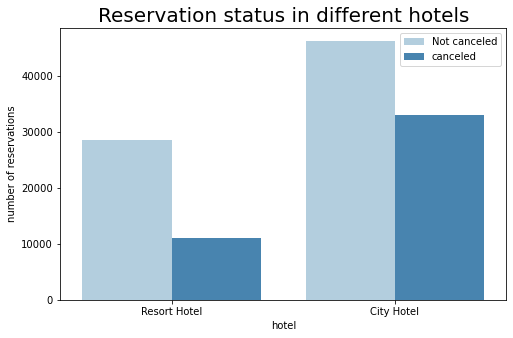

In [23]:
# Now we can look into the comparison part between the two hotels mentioned in the given dataset, we will use a plot for that.
plt.figure(figsize=(8,5))
ax1=sns.countplot(x="hotel",hue='is_canceled',data=df,palette='Blues')
legend_labels,_=ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['Not canceled','canceled'])
plt.show()

In [24]:
# We can see a very high ratio in the case of resort hotel, and very small ratio in case of city hotel, it can be due to many reasons like the price of the reservations in case of resort hotel and in case of city hotel it can be due to maintenence of rooms,etc.

In [25]:
# We need to filter the data to resort hotel and look into the percentage of cancelation rate.
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [26]:
#We need to filter the data to city hotel and look into the percentage of cancelation rate.
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [27]:
# Now that we have visualized our problem we will see factors affecting it

# So in regard to the previous solution, we can now see if factors like price have any affect on the cancelation rates of both the hotels.
# Using visualization we will see an over all effect of factors as well as be able to compare both of the hotels.

In [29]:
# We are grouping the data of these hotels in terms of their average adr rate
# It starts with us grouping the data by the "reservation_status_date", so we can get all the data of same date in a group then we can just take the average of adr, so then in the end
# We have an average of adr for these reservation dates.


resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

# We now have the average daily adr rate for the resort and city hotel based on reservation_status_date
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-05,115.363333
2015-01-06,133.677143
2015-01-07,82.485455
...,...
2017-12-05,103.287534
2017-12-06,159.808929
2017-12-07,160.306275


In [30]:
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-05,58.900000
2015-01-06,69.216667
2015-01-07,82.877500
...,...
2017-12-04,128.755465
2017-12-05,124.544536
2017-12-06,132.725882


In [ ]:
# Now, we can visualize these average rates on basis of reservation 

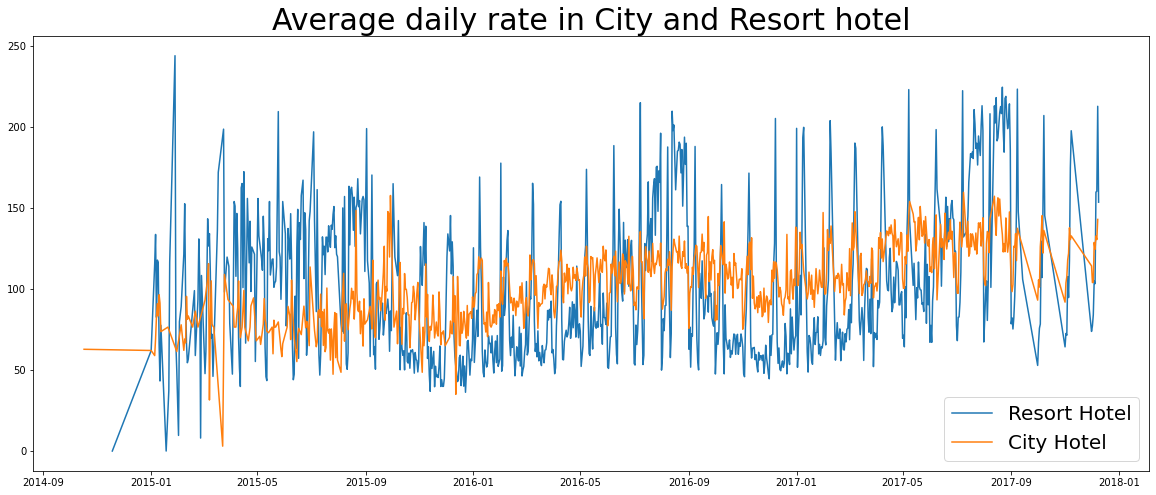

In [33]:
plt.figure(figsize=(20,8))
plt.title('Average daily rate in City and Resort hotel', fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label="Resort Hotel")
plt.plot(city_hotel.index,city_hotel['adr'],label="City Hotel")
plt.legend(fontsize=20)
plt.show()

In [ ]:
# The price of city hotel is less than the resort hotel, also the spikes that we see are due to weekends, we can consider that on weekends the price of resort hotel and city hotel 
# increases, also the average adr rate of city hotel is low in comparison to the resort hotel, it is just in the middle, while we can see that resort hotel has a wider range of spikes.


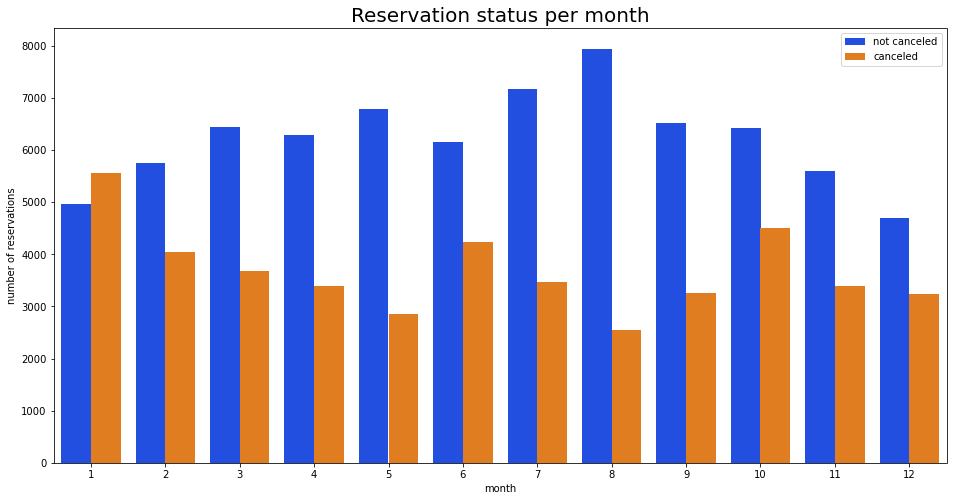

In [35]:
# We can take a step furthur and check for the total cancelation of reservation versus the reservations not being canceled.

# We will create a dataframe for month first.

df['month']=df['reservation_status_date'].dt.month
# The above code will create a month column and it will take the month from the reservation_status_time and that is the reason we use dt.month.

plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status per month",size=20)
plt.xlabel('month')
plt.ylabel("number of reservations")
plt.legend(['not canceled','canceled'])
plt.show()


In [ ]:
# So in the month of august cancelation count is the lowest, also in month of august highest number of reservations is seen.
# Highest cancelation count is in the month of january
# The lowest reservation made so far is in january and december.
# A bit confusing visual.
# It can be that january might have the lowest price, or rather a very high hence people may be canceling it more,

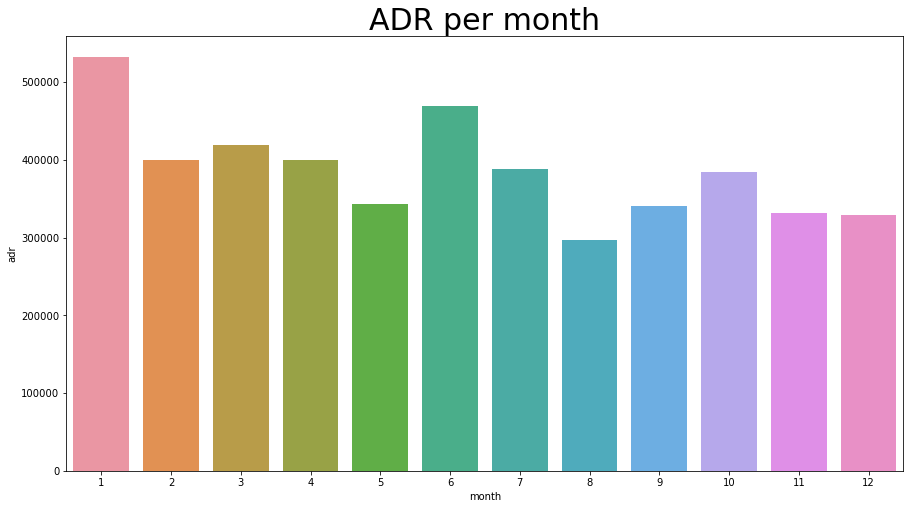

In [37]:
# We will be plotting the average daily rate for every month
plt.figure(figsize=(15,8))
plt.title("ADR per month",fontsize=30)

# We want to check if price has any effect on the cancelation rate, so we will filter by cancelation column
# And since we took out the month column from the index we will just reset the index at the end.
sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

In [ ]:
# In this case we again see that bacause of price being high in january the cancelation counts are higher

# Average daily rate (ADR), one of the three key hotel performance indicators (along with occupancy and RevPAR), is the measure of the average paid for rooms sold in a given time period.
# A hotel’s ADR, Average Daily Rate, is the measure of the average rate paid per room that’s occupied at the property. Ultimately, it’s a KPI that helps hoteliers identify their room rates from a day-to-day perspective. ADR is calculated to have an understanding of a hotel’s profits and performance.
# https://www.travelmediagroup.com/what-is-hotel-adr-understanding-hotel-performance/

In [38]:
# Now we will look how countries affect the cancelation rate
# Since there are over 140 countries we will consider the top 10 countries from which major contributers
# As there are certain countries which only have one entry.

canceled_data=df[df['is_canceled']==1]

top_10_country=canceled_data['country'].value_counts()[:10]
# We show value in descending order, and it returns a series of top 10 country variables

# We can show the above data as a bar graph or pie chart.
top_10_country

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

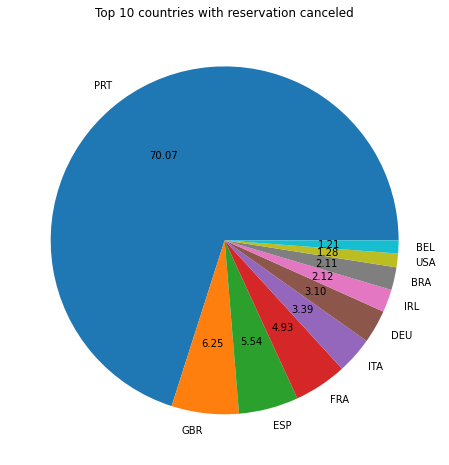

In [39]:
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [ ]:
# portugal has the highest cancelation rate, so one of the suggestion that we can give to the hotel is that they can consider
# Improving facilities for their facilities for their hotels in portugal, they could try giving promotional discounts
# Such cancelation rates will decrease on discounts and heavy advertisments

In [42]:
# Now let us see from where the clients are coming from, whether it is offline or online agents.
# This particular information is stored in value is stored in market segmentation.
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [43]:
# So, I am thinking of groupby market segment column... and then we can compare the cancelation rate for online and offline connecting clients

# But, before that let us see the total customers coming from these fields

df['market_segment'].value_counts()


Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [44]:
# Highest customer count is frim online travel agent.
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [45]:
canceled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [ ]:
# Now this is a huge problem, as 47% of the crowd is making reservations but out of which 46% are canceling their reservations.
# The hotels have to improve thier image in case of online bookings like how they are advertising it and how honest they are about 
# the facilities they are offering, pictures of rooms, etc.

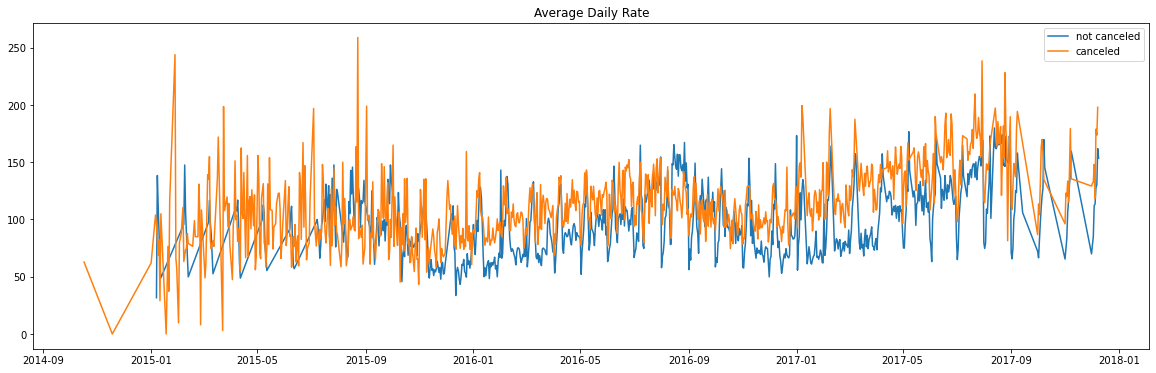

In [46]:
# We need to check whether adr was high on canceled reservations or for when reservations were not canceled.
# We did something similar earlier but we used hotels as filter for our data and checked the adr.mean() for each of the hotel.

canceled_df_adr=canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_data=df[df['is_canceled']==0]

not_canceled_df_adr=not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace=True)


# Plotting the values

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='canceled')
plt.legend()


In [48]:
# Our data is a bit spred, also data before 2015 is low and after 2017 data is low.
# Hence there is a need  to filter the data to the proper range.

canceled_df_adr=canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016')&( canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr=not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2016')&( not_canceled_df_adr['reservation_status_date']<'2017-09')]


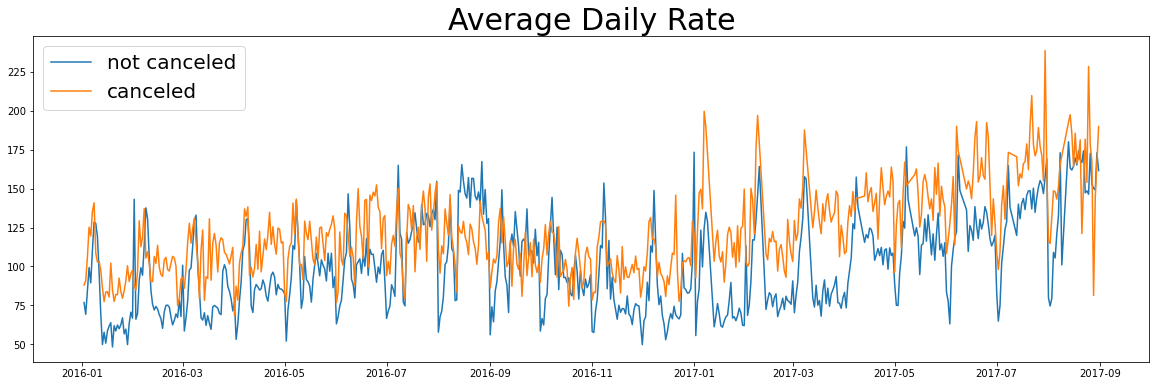

In [51]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=30)
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='canceled')
plt.legend(fontsize=20)
plt.show()